# Notebook 7

## Ejemplo sobre aplicación de una integral numérica

#### Python 🐍

> Dr. Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$


En clase encontramos que para calcular el periodo de un péndulo es necesario encontrar la integral elíptica de primer tipo:

$$
K(m) = \int _0 ^1  \frac{dx}{\sqrt{1-x^2} \sqrt{1-mx^2}}
$$

donde el parámetro $m$ está relacionado con la amplitud inicial del péndulo. Esta integral es particularmente especial en $x=1$, ya que el integrando diverge. El objetivo de este notebook es ver en que condiciones se puede tener un valor finito de la integral. Las bibliotecas que ocuparemos son:

In [1]:
from pylab import *

Comencemos por ver el comportamiento del integrando y para que *Python* no marque error, haremos la gráfica parecido a $x\in[0,1)$, es decir, casi llegando a $x=1$.

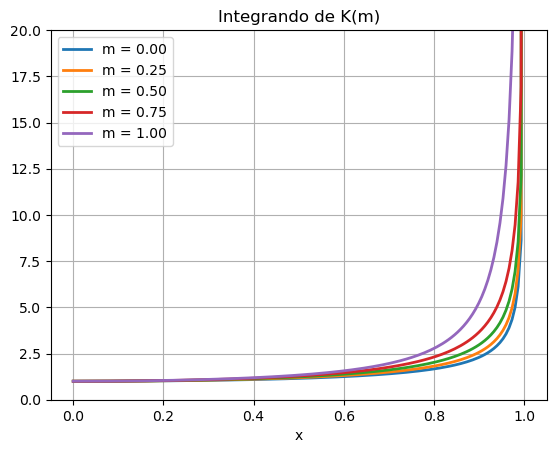

In [2]:
delta = 1e-5
x = linspace(0,1-delta,150)
ms = linspace(0,1,5)
title("Integrando de K(m)")
for m in ms:
    y = 1.0 /sqrt( (1.0 - x**2)*(1 - m*(x**2)) )
    plot(x,y,label="m = %2.2f" %m,lw=2)
ylim([0,20]),legend(),xlabel("x"),grid()
show()

En muchas ocasiones este tipo de integrales requiere un tratamiento especial, pero al menos con las herramientas que tenemos podemos darnos una idea sobre su convergencia. Podemos utilizar el segundo algoritmo que desarrollamos en el notebook pasado.

In [3]:
def int_alg2(x,y):
    integral = 0
    h = x[1] - x[0]
    if mod(len(y),2) == 0:
        inicio = 2
    elif mod(len(y),2) == 1:
        inicio = 1
    for i in range(inicio,len(y)-1,2):
        integral += y[i+1] + 4*y[i] + y[i-1]
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(len(y),2) == 0:
        integral += (h/48)*(23*y[0] + 26*y[1] - 4*y[2] + 6*y[3] -3*y[4])
    return integral

Primero examinemos el caso $m=0$, ya que de manera analítica debe dar $\pi/2$. Como el algoritmo anterior necesita los puntos de la función sobre la malla, no podemos hacer la evaluación de la función en $x=1$, ya que si lo hacemos se tendría un punto que vale infinito. Esto de ve de manifiesto en el siguiente ejemplo donde el rango de integración va de 0 a 1:

In [4]:
m=0
epsilon = 0
x = linspace(0,1-epsilon,1000)
y = 1.0 /sqrt( (1.0 - x**2)*(1 - m*(x**2)) )
print("Epsilon: ",epsilon,"\t Rango de integración: [",min(x),",",max(x),"]")
print("Valor de la integral: ",int_alg2(x,y), "\t Valor esperado: ",pi/2)

Epsilon:  0 	 Rango de integración: [ 0.0 , 1.0 ]
Valor de la integral:  inf 	 Valor esperado:  1.5707963267948966


/var/folders/ts/phx_fz414_77w9fcy8yp9hqr0000gn/T/ipykernel_42240/3392483664.py:4: RuntimeWarning: divide by zero encountered in true_divide
  y = 1.0 /sqrt( (1.0 - x**2)*(1 - m*(x**2)) )


In [5]:
m=0
epsilon = 1e-7
x = linspace(0,1-epsilon,100000)
y = 1.0 /sqrt( (1. - x**2.)*(1 - m*(x**2)) )
print("Epsilon: ",epsilon,"\t Rango de integración: [",min(x),",",max(x),"]")
print("Valor de la integral: ",int_alg2(x,y), "\t Valor esperado: ",pi/2)

Epsilon:  1e-07 	 Rango de integración: [ 0.0 , 0.9999999 ]
Valor de la integral:  1.5754034362621112 	 Valor esperado:  1.5707963267948966


Como se puede apreciar, el resultado es próximo a $\pi /2$. Veamos la convergencia de la integral en términos del número de puntos en la malla. En la siguiente gráfica se empieza con $10^{3}$ puntos y se termina con $10^5$.

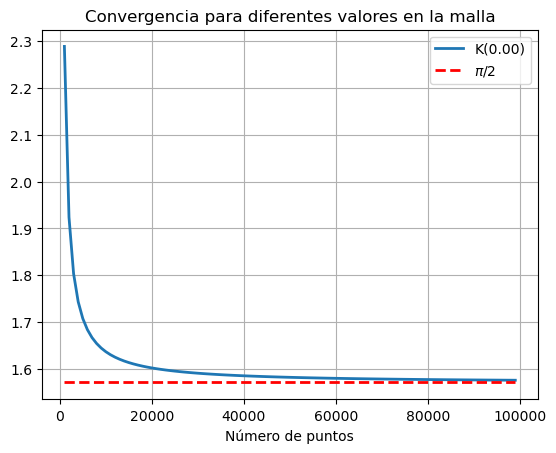

In [6]:
m = 0
epsilon = 1e-7
paso, max_n = int(1e3), int(1e5)
num_puntos = arange(1000,max_n,paso)
resultados = np.zeros(len(num_puntos))
for i in range(0,len(num_puntos)):
    x = linspace(0,1-epsilon,num_puntos[i])
    y = 1.0 /sqrt( (1. - x**2.)*(1 - m*(x**2)) )
    resultados[i] = int_alg2(x,y)
plot(num_puntos,resultados,lw=2,label="K(%2.2f)" %m)
title("Convergencia para diferentes valores en la malla"),xlabel("Número de puntos")
hlines(pi/2,num_puntos[0],num_puntos[-1],colors='r', linestyles='dashed',lw=2,label="$\pi /2$")
legend(),grid()
show()

Como se puede observar, conforme se hace un mayor refinamiento de la malla se tiene un acercamiento mayor al valor de $\pi/2$. Ahora veamos que sucede con la convergencia cuando se tienen diferentes valores de $\epsilon$ conforme éste va disminuyendo.

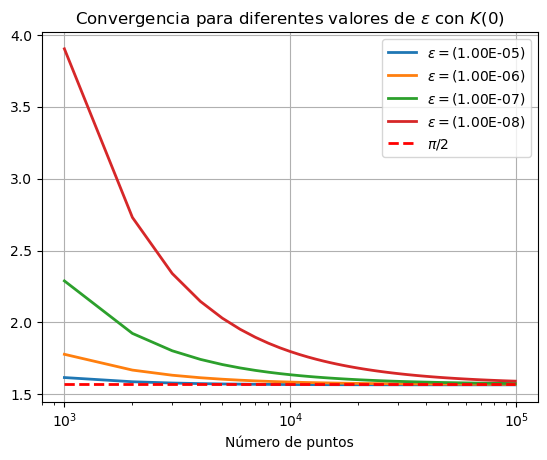

In [7]:
m = 0
epsilon_s = epsilon_s = 1/10**arange(5,9,1)
paso, max_n = int(1e3), int(1e5)
num_puntos = arange(1000,max_n,paso)
resultados = np.zeros(len(num_puntos))

for epsilon in epsilon_s:
    for i in range(0,len(num_puntos)):
        x = linspace(0,1-epsilon,num_puntos[i])
        y = 1.0 /sqrt( (1. - x**2.)*(1 - m*(x**2)) )
        resultados[i] = int_alg2(x,y)
    semilogx(num_puntos,resultados,lw=2,label="$\epsilon =$(%2.2E)" %epsilon)
title("Convergencia para diferentes valores de $\epsilon$ con $K(0)$"),xlabel("Número de puntos")
hlines(pi/2,num_puntos[0],num_puntos[-1],colors='r', linestyles='dashed',lw=2,label="$\pi /2$")
legend(),grid()
show()

> Nota: Se usa en el eje $x$ una escala logarítmica con la finalidad de mostrar con mayor detalle las trayectorias en la zona de pocos puntos en la malla.

En la gráfica anterior se puede apreciar que la tendencia es la misma que en la anterior pero con un diferente punto de inicio debido a que cada vez se está más próximo cercano al punto donde el integrando diverge. 

Veamos que sucede para los otros valores de $m$ conforme se hace el refinamiento de la malla numérica y donde dejamos fijo el valor de $\epsilon$.

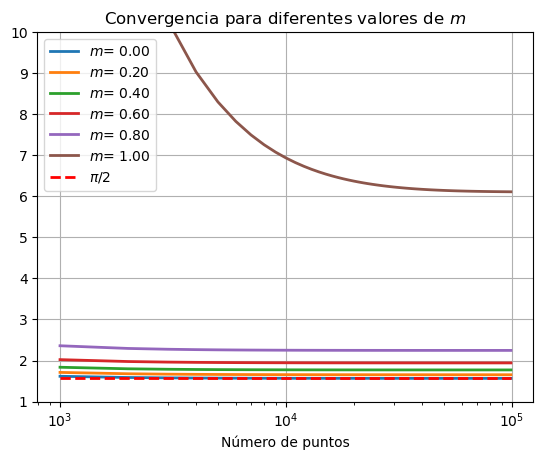

In [8]:
ms = arange(0,1.2,.2)
epsilon = 1e-5
paso, max_n = int(1e3), int(1e5)
num_puntos = arange(1000,max_n,paso)
resultados = np.zeros(len(num_puntos))

for m in ms:
    for i in range(0,len(num_puntos)):
        x = linspace(0,1-epsilon,num_puntos[i])
        y = 1.0 /sqrt( (1. - x**2.)*(1 - m*(x**2)) )
        resultados[i] = int_alg2(x,y)
    semilogx(num_puntos,resultados,lw=2,label="$m$= %2.2f" %m)
title("Convergencia para diferentes valores de $m$"),xlabel("Número de puntos")
hlines(pi/2,num_puntos[0],num_puntos[-1],colors='r', linestyles='dashed',lw=2,label="$\pi /2$")
legend(),grid(),ylim([1,10])
show()

Como se puede ver el caso con $m=1$ no se tiene convergencia. Esto se puede ver claramente en el momento en el que hacemos la gráfica para varios valores de $\epsilon$:

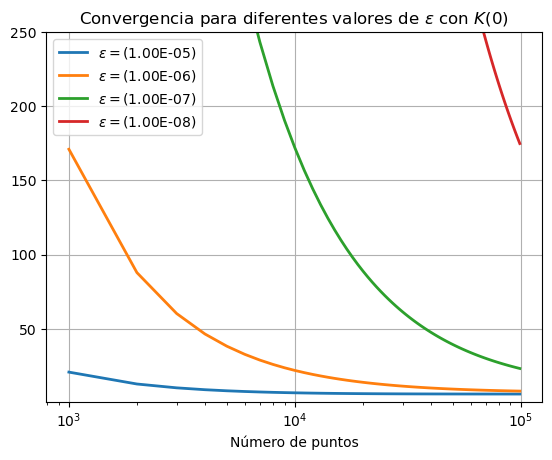

In [9]:
m = 1
epsilon_s = epsilon_s = 1/10**arange(5,9,1)
paso, max_n = int(1e3), int(1e5)
num_puntos = arange(1000,max_n,paso)
resultados = np.zeros(len(num_puntos))

fig,ejes = subplots()
for epsilon in epsilon_s:
    for i in range(0,len(num_puntos)):
        x = linspace(0,1-epsilon,num_puntos[i])
        y = 1.0 /sqrt( (1. - x**2.)*(1 - m*(x**2)) )
        resultados[i] = int_alg2(x,y)
    ejes.semilogx(num_puntos,resultados,lw=2,label="$\epsilon =$(%2.2E)" %epsilon)
title("Convergencia para diferentes valores de $\epsilon$ con $K(0)$"),xlabel("Número de puntos")
legend(),grid(),ylim([1,250])
show()

En las gráficas parecería que hay algún tipo de convergencia, sin embargo no es así como se observa en la siguiente gráfica:

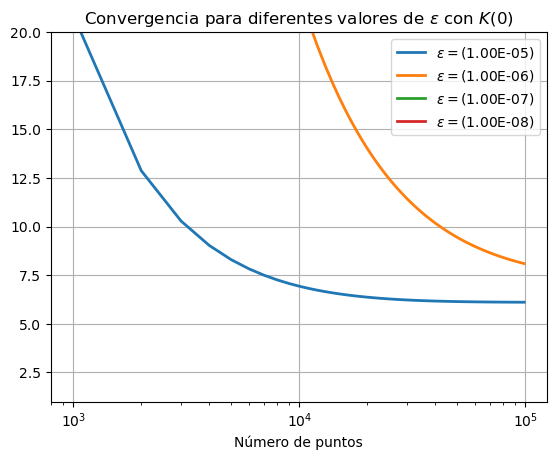

In [10]:
ejes.set_ylim([1,20])
fig

Como se puede observar la convergencia de la integral para $m=1$ es diferente dependiendo del valor de $\epsilon$. Esto se puede interpretar como el hecho de que la integral no converge ya que conforme nos acercamos a $x=1$, el valor de la integral aumenta.

De esta manera ahora estamos en posibilidad de graficar la función $K(m)$ con mayor seguridad de lo que estamos haciendo.

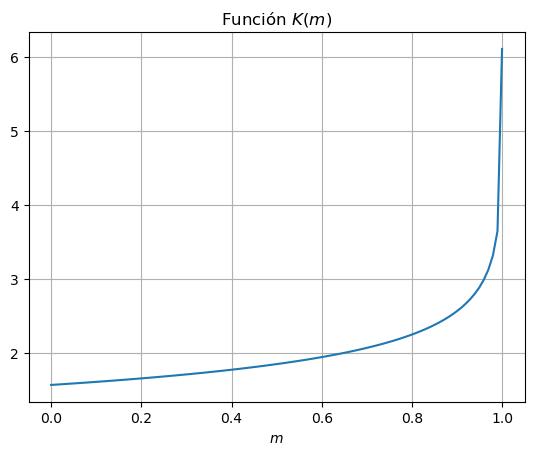

In [11]:
ms = linspace(0,1,100)
epsilon = 1e-5
paso, max_n = int(1e3), int(1e5)
K_m = np.zeros(len(ms))
for i in range(len(ms)):
    x = linspace(0,1-epsilon,max_n)
    y = 1.0 /sqrt( (1. - x**2.)*(1 - ms[i]*(x**2)) )
    K_m[i] = int_alg2(x,y)
plot(ms,K_m)
title("Función $K(m)$"),xlabel("$m$"),grid()
show()

En la literatura se puede ver el comportamiento general de $K(m)$ y se puede verificar que para $m=1$ dicha integral diverge [1]. 

[1] Abramowitz and Stegun. *Handbook of mathematical functions*. Matirno Publishing (2014). Cap 17. 

En muchas ocasiones la integración numérica de funciones cerca de puntos de divergencia o con intervalos cada vez más grandes es todo un área del análisis en matemáticas y del cómputo científico.

[Regresar a la página del curso.](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo del proyecto DGAPA-PAPIME:

+ PE 103021 nueva versión durante el año 2022. Versión interactiva en Colab.
+ PE 112919 durante el año 2020. Idea original.